In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
# img_dir = '/home/ajc/Documents/terrain-classification/image-data/tmp/'
# imgL = cv.imread(img_dir + 'HighandLow-Dirt-Full-left-0.jpg')
# imgR = cv.imread(img_dir + 'HighandLow-Dirt-Full-right-0.jpg')

In [3]:
# # https://jayrambhia.com/blog/disparity-mpas
# # sgbm.SADWindowSize = 5;
# # sgbm.numberOfDisparities = 192;
# # sgbm.preFilterCap = 4;
# # sgbm.minDisparity = -64;
# # sgbm.uniquenessRatio = 1;
# # sgbm.speckleWindowSize = 150;
# # sgbm.speckleRange = 2;
# # sgbm.disp12MaxDiff = 10;
# # sgbm.fullDP = false;
# # sgbm.P1 = 600;
# # sgbm.P2 = 2400;

# # stereo = cv.StereoSGBM_create(
# #     minDisparity = -64,
# #     numDisparities = 192,
# #     blockSize = 5,
# #     P1 = 600,
# #     P2 = 2400,
# #     disp12MaxDiff = 10,
# #     preFilterCap = 4,
# #     uniquenessRatio = 1,
# #     speckleWindowSize = 150,
# #     speckleRange = 2,
# #     mode = True,
# # )

# stereo = cv.StereoSGBM_create()

# print('computing disparity...')
# disp = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

In [4]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# ax1.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB))
# ax2.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB))
# ax3.imshow(disp);

In [5]:
# import numpy as np
# from sklearn.preprocessing import normalize
# import cv2
 
# print('loading images...')
# # imgL = cv2.imread('imgL.jpg')  # downscale images for faster processing
# # imgR = cv2.imread('imgR.jpg')

# img_dir = '/home/ajc/Documents/terrain-classification/image-data/tmp/'
# imgL = cv.imread(img_dir + 'HighandLow-Dirt-Full-left-0.jpg')
# imgR = cv.imread(img_dir + 'HighandLow-Dirt-Full-right-0.jpg')

# # SGBM Parameters -----------------
# window_size = 3                     # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
 
# left_matcher = cv2.StereoSGBM_create(
#     minDisparity=0,
#     numDisparities=160,             # max_disp has to be dividable by 16 f. E. HH 192, 256
#     blockSize=5,
#     P1=8 * 3 * window_size ** 2,    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
#     P2=32 * 3 * window_size ** 2,
#     disp12MaxDiff=1,
#     uniquenessRatio=15,
#     speckleWindowSize=0,
#     speckleRange=2,
#     preFilterCap=63,
#     mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
# )
 
# right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
 
# # FILTER Parameters
# lmbda = 80000
# sigma = 1.2
# visual_multiplier = 1.0
 
# wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
# wls_filter.setLambda(lmbda)
# wls_filter.setSigmaColor(sigma)
 
# print('computing disparity...')
# displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
# dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
# displ = np.int16(displ)
# dispr = np.int16(dispr)
# filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!
 
# filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
# filteredImg = np.uint8(filteredImg)
# # cv2.imshow('Disparity Map', filteredImg)
# # cv2.waitKey()
# # cv2.destroyAllWindows()

In [6]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# ax1.imshow(cv.cvtColor(imgL, cv.COLOR_BGR2RGB))
# ax2.imshow(cv.cvtColor(imgR, cv.COLOR_BGR2RGB))
# ax3.imshow(filteredImg);

In [7]:
import numpy as np
import cv2

class StereoDepth():

    def __init__(self, focal_length = 100, cam_dist = 10):
        #Depth alg variables
        lmbda = 80000
        sigma = 1.2
        visual_multiplier = 1.0
        window_size = 3
        self.focal_length = focal_length
        self.cam_dist = cam_dist
         
        self.lMatcher = cv2.StereoSGBM_create(
#             ---- HALL ----
            minDisparity = 0,
            numDisparities = 160,
#             blockSize = 5,
#             P1 = 8 * 3 * window_size ** 2,
#             P2 = 32 * 3 * window_size ** 2,
#             disp12MaxDiff = 1,
#             uniquenessRatio = 15,
#             speckleWindowSize = 0,
#             speckleRange = 2,
#             preFilterCap = 63,
#             mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
            
#             ---- https://jayrambhia.com/blog/disparity-mpas ---
#             minDisparity = -64,
#             numDisparities = 192,
            blockSize = 5,
            P1 = 600,
            P2 = 2400,
            disp12MaxDiff = 10,
            uniquenessRatio = 1,
            speckleWindowSize = 150,
            speckleRange = 2,
            preFilterCap = 4,
            mode=True
        )        
        
        self.rMatcher = cv2.ximgproc.createRightMatcher(self.lMatcher)

        self.wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=self.lMatcher)
        self.wls_filter.setLambda(lmbda)
        self.wls_filter.setSigmaColor(sigma)
        
    def calculate_disparity(self, lFrame, rFrame):
        lGray = cv2.cvtColor(lFrame, cv2.COLOR_BGR2GRAY)
        rGray = cv2.cvtColor(rFrame, cv2.COLOR_BGR2GRAY)
        dispL = self.lMatcher.compute(lGray, rGray)
        dispR = self.rMatcher.compute(rGray, lGray)
        dispL = np.int16(dispL)
        dispR = np.int16(dispR)
        d_map = self.wls_filter.filter(dispL, lFrame, None, dispR)
        
        #reformat d_map for opencv
        d_map = cv2.normalize(src=d_map, dst=d_map, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
        d_map = np.uint8(d_map[:, 160:])
        d_map = cv2.resize(d_map, (400, 400), interpolation = cv2.INTER_AREA)
        return d_map

In [8]:
img_dir = Path('/home/ajc/Documents/terrain-classification/image-data/01-single-rgb/')
out_dir = Path('/home/ajc/Documents/terrain-classification/image-data/02-disparity-maps/')

img_classes = ['high', 'medium', 'low']

dProcessor = StereoDepth()

for clss in img_classes:
    
    img_fnames_left = sorted((img_dir / clss).glob('*eft-[0-9]*.jpg'))
    img_fnames_right = sorted((img_dir / clss).glob('*ight-[0-9]*.jpg'))
    
    print(clss, len(img_fnames_right)*2)
    
    out_dir_class = out_dir / clss
    out_dir_class.mkdir(parents=True, exist_ok=True)

    for fname_left, fname_right in zip(img_fnames_left, img_fnames_right):

        img_left = cv.imread(str(fname_left))
        img_right = cv.imread(str(fname_right))

        d_map = dProcessor.calculate_disparity(img_left, img_right)
        
        out_fname = fname_left.name
        out_fpath = out_dir_class / out_fname
        
        cv.imwrite(str(out_fpath), d_map)
        
        if d_map.shape != (400, 400):
            print(fname_left.name, fname_right.name)
        
#         break
#     break

high 4688
medium 3866
low 3218


In [2]:
import random

1184
Low(Right-Side)-Dirt-Half-left-60.jpg
Low(Right-Side)-Dirt-Half-left-60.jpg
Low(Right-Side)-Dirt-Half-right-60.jpg


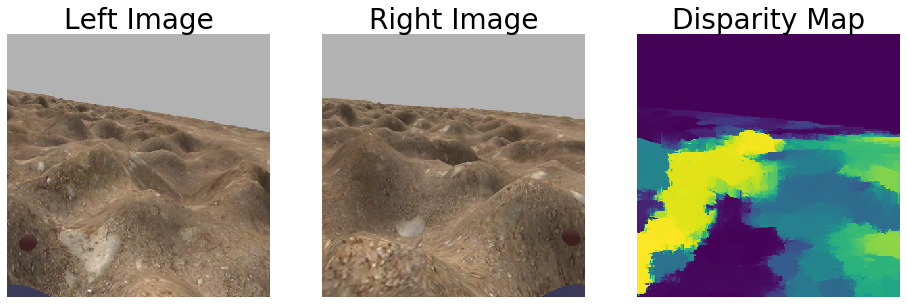

In [3]:
dsp_path = Path('/home/ajc/Documents/terrain-classification/image-data/02-disparity-maps/low/')
img_path = Path('/home/ajc/Documents/terrain-classification/image-data/01-single-rgb/low/')
dsp_fnames = list(dsp_path.glob('*.jpg'))

random_img_idx = random.randrange(len(dsp_fnames))
random_img_idx = 1184

dsp_fname = dsp_fnames[random_img_idx]
lft_fname = img_path/dsp_fname.name
rgt_fname = img_path/(dsp_fname.name.replace('-left-', '-right-').replace('-Left-', '-Right-'))

print(random_img_idx)
print(dsp_fname.name)
print(lft_fname.name)
print(rgt_fname.name)

imgs = [
    ('Left Image', plt.imread(lft_fname)),
    ('Right Image', plt.imread(rgt_fname)),
    ('Disparity Map', plt.imread(dsp_fname)),
]

fig, axes = plt.subplots(1, 3, figsize=(16,16))

for (img_name, img), ax in zip(imgs, axes):
    ax.imshow(img);
    ax.set_title(img_name, fontsize=28)
    ax.axis('off')
    

In [5]:
fig.savefig('disparity.pdf', bbox_inches='tight')

In [8]:
img_dir = Path('/home/ajc/Documents/terrain-classification/image-data/grass/1-rgb')
out_dir = Path('/home/ajc/Documents/terrain-classification/image-data/grass/2-dsp')

img_classes = ['high', 'medium', 'low']

dProcessor = StereoDepth()

for clss in img_classes:
    
    img_fnames_left = sorted((img_dir / clss / 'left').glob('*.jpg'))
    img_fnames_right = sorted((img_dir / clss / 'right').glob('*.jpg'))
    
    print(clss, len(img_fnames_right))
    
    out_dir_class = out_dir / clss
    out_dir_class.mkdir(parents=True, exist_ok=True)

    for fname_left, fname_right in zip(img_fnames_left, img_fnames_right):

        img_left = cv.imread(str(fname_left))
        img_right = cv.imread(str(fname_right))

        d_map = dProcessor.calculate_disparity(img_left, img_right)
        
        out_fname = fname_left.name
        out_fpath = out_dir_class / out_fname
        
        cv.imwrite(str(out_fpath), d_map)
        
        if d_map.shape != (400, 400):
            print(fname_left.name, fname_right.name)
        
#         break
#     break

high 568
medium 590
low 590
